In [16]:
import tensorflow as tf
import keras
from keras import layers
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
"""
reshape((
    number of training sample (จำนวนรูปภาพที่ใช้ train),
    width (ความกว้างรูปภาพ),
    height (ความสูงรูปภาพ),
    channels (1 สำหรับภาพขาวดำ (Greyscale) 3 สำหรับภาพสี แยกเป็น (R,G,B))
))
"""
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [11]:
# Convolutional Neural Network (CNN)
model = keras.Sequential(
    [
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax') # ใช้ softmax สำหรับ output > 2 (10)
    ]
)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

Epoch 1/5
750/750 [==============================] - 43s 55ms/step - loss: 0.2168 - accuracy: 0.9319 - val_loss: 0.0747 - val_accuracy: 0.9784
Epoch 2/5
750/750 [==============================] - 41s 55ms/step - loss: 0.0580 - accuracy: 0.9824 - val_loss: 0.0607 - val_accuracy: 0.9825
Epoch 3/5
750/750 [==============================] - 41s 55ms/step - loss: 0.0419 - accuracy: 0.9866 - val_loss: 0.0445 - val_accuracy: 0.9858
Epoch 4/5
750/750 [==============================] - 44s 58ms/step - loss: 0.0310 - accuracy: 0.9907 - val_loss: 0.0468 - val_accuracy: 0.9860
Epoch 5/5
313/313 [==============================] - 4s 12ms/step - loss: 0.0316 - accuracy: 0.9893
Test accuracy: 0.989300012588501


1/1 [==============================] - 0s 33ms/step


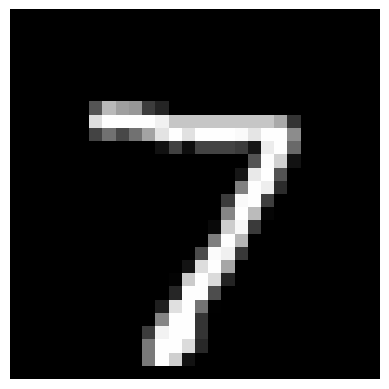

Model prediction: 7



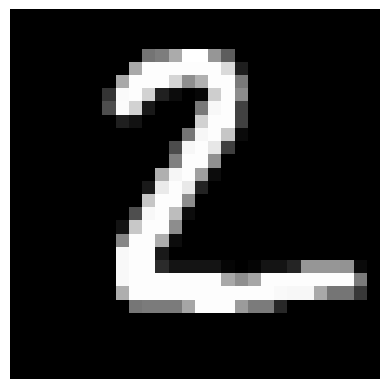

Model prediction: 2



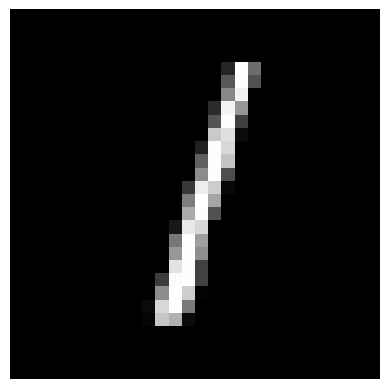

Model prediction: 1



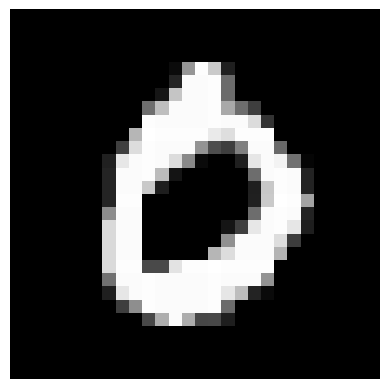

Model prediction: 0



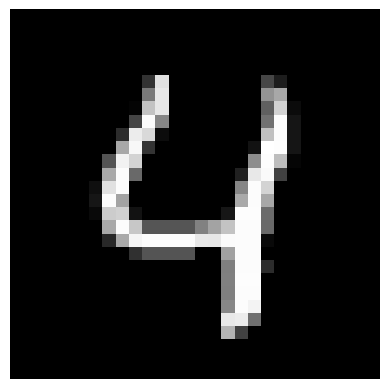

Model prediction: 4



In [19]:
num_test_images = 5
test_images_sample = test_images[:num_test_images]
predictions = model.predict(test_images_sample)

for i in range(num_test_images):
    # Display the original image
    plt.imshow(test_images_sample[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.show()

    # Get the predicted label
    predicted_label = np.argmax(predictions[i])

    print(f'Model prediction: {predicted_label}\n')